In [1]:
import qiskit as q
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Codage super dense

In [2]:
simulator = q.Aer.get_backend('qasm_simulator')
circuit = q.QuantumCircuit(2, 2)

In [3]:
# Création du circuit
circuit.h(0)
circuit.cx(0, 1)

message_alice = '11'

# Porte d'Alice selon le message à transmettre
if message_alice == '00':
    circuit.iden(0)
elif message_alice == '01':
    circuit.z(0)
elif message_alice == '10':
    circuit.x(0)
elif message_alice == '11':
    circuit.x(0)
    circuit.z(0)

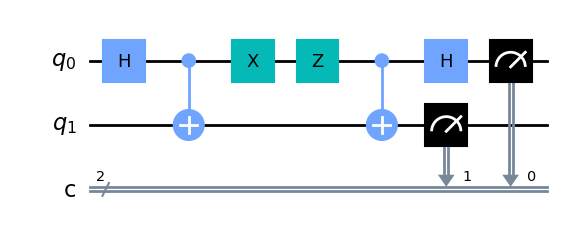

In [4]:
# Décodage
circuit.cx(0, 1)
circuit.h(0)

# Mesures
circuit.measure([0,1], [0,1])
circuit.draw(output='mpl')

In [5]:
# Lancer de 1000 simulations
job = q.execute(circuit, simulator, shots=1000)

# Résultats
result = job.result()

counts = result.get_counts(circuit)
print("Nombre de '00', '01', '10' '11':",counts)

Nombre de '00', '01', '10' '11': {'11': 1000}


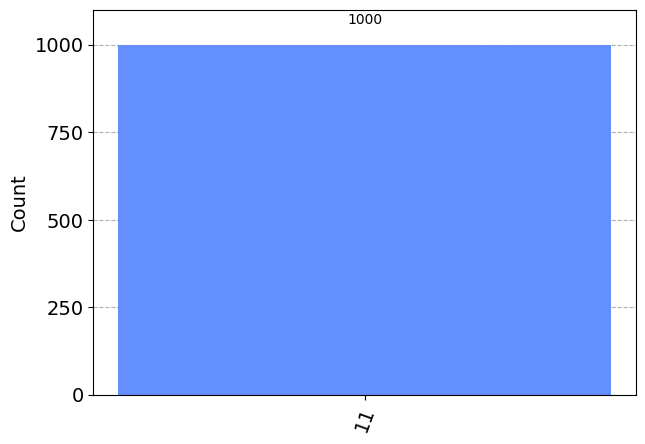

In [6]:
plot_histogram(counts)